In [0]:
import keras
from keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(f'Number of train images {X_train.shape[0]}')
print(f'Number of test images {X_test.shape[0]}')
print(f'Shape of each image {X_train.shape[1]} x {X_train.shape[2]}')

Number of train images 60000
Number of test images 10000
Shape of each image 28 x 28


In [0]:
from keras import backend as K

In [0]:
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
  X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
else:
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
  X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

### **ConvNet 1** Using 3 convolution layers of 5x5, 3x3, 2x2 kernels with same padding. Maxpooling of 2,2.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
model = Sequential()

model.add(Conv2D(filters = 64,kernel_size = (5,5), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.35))

model.add(Conv2D(filters = 16,kernel_size = (2,2), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.he_normal(0)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 510us/step - loss: 1.1565 - acc: 0.6184 - val_loss: 0.1783 - val_acc: 0.9483
Epoch 2/20
60000/60000 [==============================] - 30s 493us/step - loss: 0.3491 - acc: 0.8945 - val_loss: 0.0955 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 29s 485us/step - loss: 0.2384 - acc: 0.9301 - val_loss: 0.0744 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 29s 481us/step - loss: 0.1934 - acc: 0.9436 - val_loss: 0.0615 - val_acc: 0.9816
Epoch 5/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.1704 - acc: 0.9503 - val_loss: 0.0532 - val_acc: 0.9829
Epoch 6/20
60000/60000 [==============================] - 29s 484us/step - loss: 0.1512 - acc: 0.9556 - val_loss: 0.0528 - val_acc: 0.9824
Epoch 7/20
60000/60000 [==============================] - 29s 477us/

NameError: ignored

Test score: 0.035986967329168694 </br>
**Test accuracy: 0.9883**

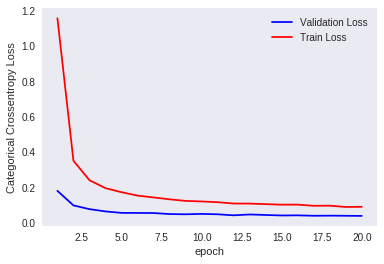

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,20+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 148s 2ms/step - loss: 1.8531 - acc: 0.3549 - val_loss: 0.7748 - val_acc: 0.7206
Epoch 2/20
60000/60000 [==============================] - 146s 2ms/step - loss: 0.8180 - acc: 0.7258 - val_loss: 0.2719 - val_acc: 0.9386
Epoch 3/20
60000/60000 [==============================] - 147s 2ms/step - loss: 0.5349 - acc: 0.8408 - val_loss: 0.1692 - val_acc: 0.9578
Epoch 4/20
60000/60000 [==============================] - 147s 2ms/step - loss: 0.4243 - acc: 0.8790 - val_loss: 0.1482 - val_acc: 0.9639
Epoch 5/20
60000/60000 [==============================] - 147s 2ms/step - loss: 0.3701 - acc: 0.8961 - val_loss: 0.1254 - val_acc: 0.9688
Epoch 6/20
60000/60000 [==============================] - 147s 2ms/step - loss: 0.3294 - acc: 0.9090 - val_loss: 0.1143 - val_acc: 0.9725
Epoch 7/20
60000/60000 [==============================] - 147s 2ms/step - loss: 0.2899 - acc: 0.9225 - val_loss: 0.1180 - 

NameError: ignored

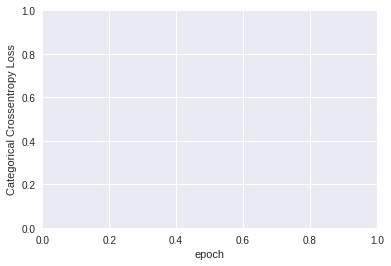

In [26]:
model = Sequential()

model.add(Conv2D(filters = 128,kernel_size = (7,7), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Conv2D(filters = 64,kernel_size = (5,5), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32,kernel_size = (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.35))

model.add(Conv2D(filters = 16,kernel_size = (2,2), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Conv2D(filters = 16,kernel_size = (2,2), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.he_normal(0)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

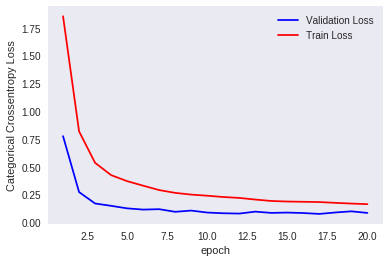

In [27]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,20+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 289s 5ms/step - loss: 2.0730 - acc: 0.2522 - val_loss: 1.4718 - val_acc: 0.3435
Epoch 2/20
60000/60000 [==============================] - 285s 5ms/step - loss: 1.3277 - acc: 0.4488 - val_loss: 1.1151 - val_acc: 0.4824
Epoch 3/20
60000/60000 [==============================] - 286s 5ms/step - loss: 1.1567 - acc: 0.5201 - val_loss: 1.0367 - val_acc: 0.5522
Epoch 4/20
60000/60000 [==============================] - 287s 5ms/step - loss: 1.0610 - acc: 0.5604 - val_loss: 0.9984 - val_acc: 0.6044
Epoch 5/20
60000/60000 [==============================] - 286s 5ms/step - loss: 1.0966 - acc: 0.5521 - val_loss: 1.3115 - val_acc: 0.4406
Epoch 6/20
60000/60000 [==============================] - 288s 5ms/step - loss: 1.0691 - acc: 0.5685 - val_loss: 1.0965 - val_acc: 0.5101
Epoch 7/20
60000/60000 [==============================] - 286s 5ms/step - loss: 0.9089 - acc: 0.6344 - val_loss: 1.0382 - 

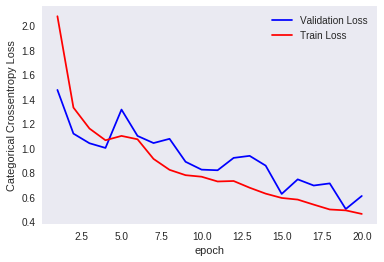

In [29]:
model = Sequential()

model.add(Conv2D(filters = 256,kernel_size = (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128,kernel_size = (5,5), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.35))
model.add(Conv2D(filters = 64,kernel_size = (7,7), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.35))

model.add(Conv2D(filters = 32,kernel_size = (3,3), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.4))
model.add(Conv2D(filters = 16,kernel_size = (2,2), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 16,kernel_size = (1,1), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 32,kernel_size = (5,5), strides=2, padding='same', activation='relu', kernel_initializer=keras.initializers.he_normal(0)))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.he_normal(0)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax', kernel_initializer=keras.initializers.he_normal(0)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20,verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,20+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion



*   It is noted that chaining two convolution layers without maxpooling and drop out reduces the convergence speed and accuracy
*   Although the 3rd architecture is deep, the accuracy is in shambles. This is the problem that Residual networks can solve.
* The MLP after flatten is not changed to check how ConvNets affect the results





*   3 ConvNets - Test Acc - 98.83%
*   5 ConvNets - Test Acc - 98.33%
*   7 ConvNets - Test Acc - 77.13%

## The Shallowest network is performing better